# Exploratory data analysis
A fictitious datasets of a financial institution is given in the "data" folder.

The dataset called "Churn_clients" is composed by 10,000 rows and 13 columns of features, where one is the "Exited" column, composed by binary data: "1" if the client had left the bank, "0" if it had not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

In [2]:
df = pd.read_csv("data/Churn_clients.csv")

### Understanding the data structure

In the cells below, the data description shows that there are 5 numerical features worth looking at: Age, Balance, CreditScore, EstimatedSalary, and Tenure.

The Gender, Geography, NumOfProducts, IsActiveMember, HasCrCard, and Exited are categorical variables. By observing the statistics further below, only the Geography feature has more than two categories, i.e., France, Spain, and Germany.

There are no duplicates or null values in this dataset.

In [3]:
df.shape         # Rows and columns
df.info()        # Data types, non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()        # Show first 5 rows

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
df.isnull().sum()         # Total missing per column

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

### Summary Statistics

It seems that there aren't any data points that are worth eliminating, because the maximum and minimum values of Balance and EstimatedSalary, for instance, make sense.

In [11]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

The plots below show that most clients are from France, but most clients from Germany are the ones leaving the bank.

There are more Male clients, but the proportion of Female is higher.

The number of members that aren't active are the ones that tend to leave the financial institution the more.

People that have more product in the bank tend to churn. Having 2 products seems to be the optimal for the bank.

Nonlinear relationships between these variables can be investigated to see how they are related. A predictor such as a deep neural network can model these relationships, or a feature engineering can be applied.

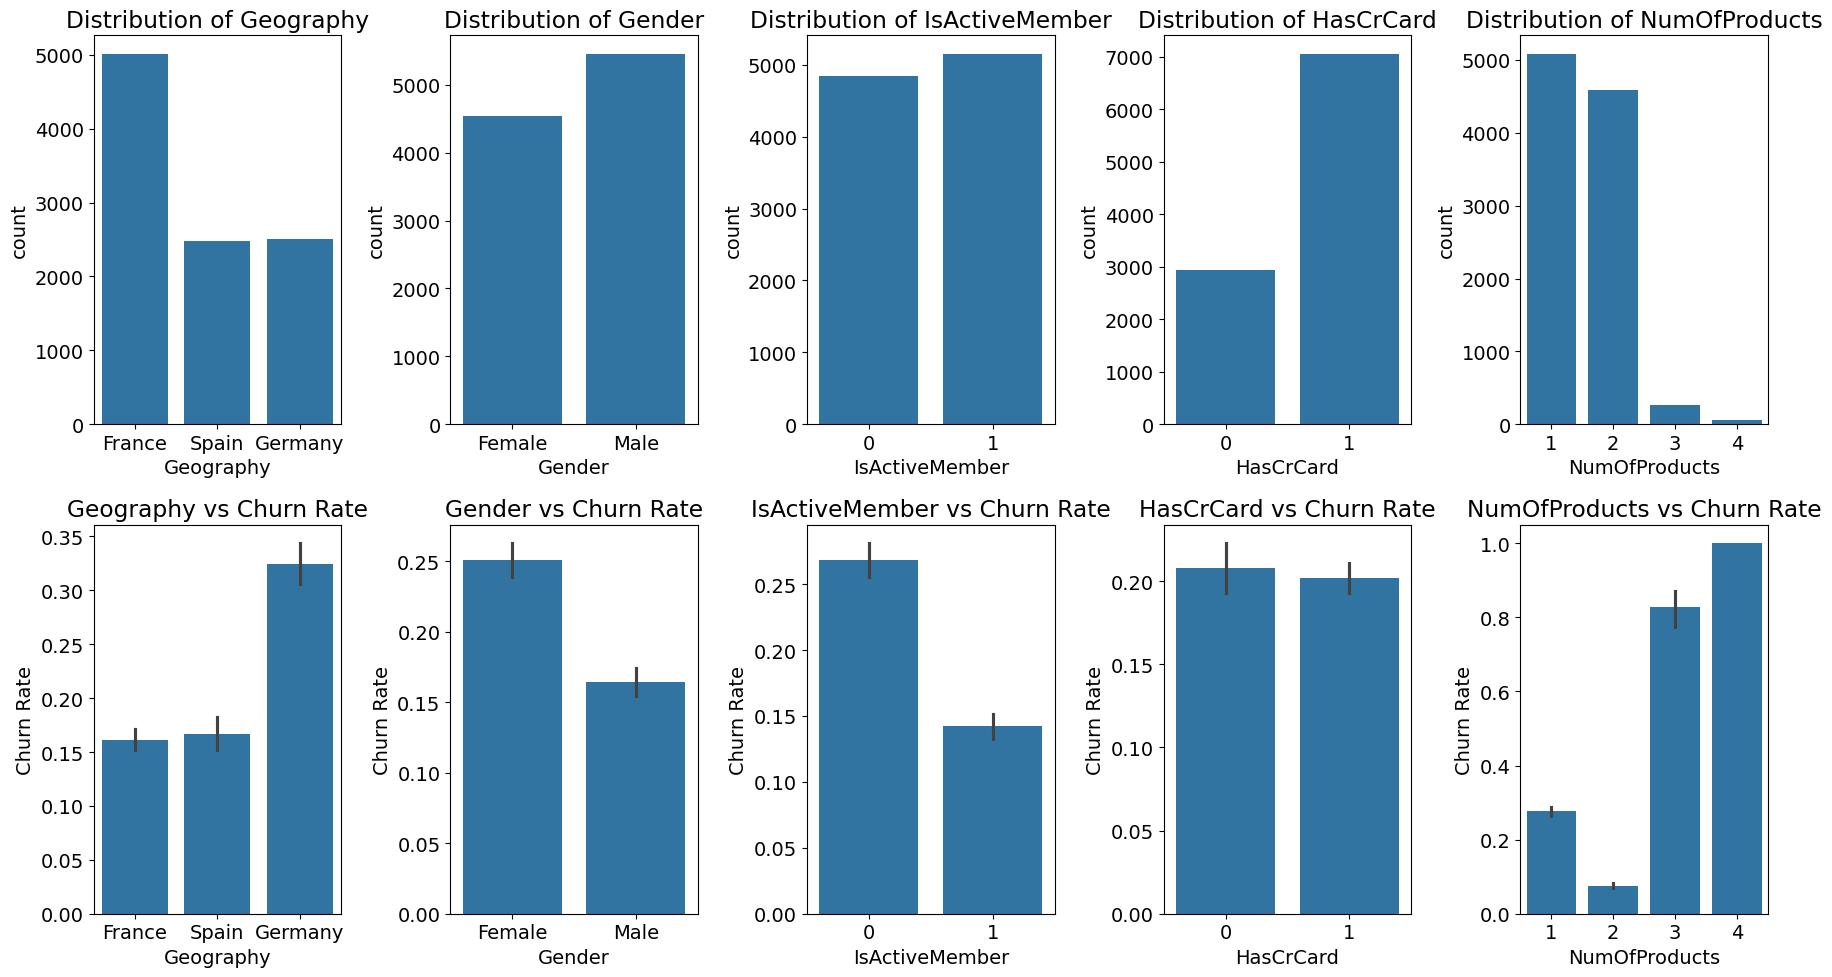

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

cat_features = ['Geography', 'Gender', 'IsActiveMember', 'HasCrCard', 'NumOfProducts']

for idx_axis, col in enumerate(cat_features):
    # Plot 1: Distribuição do atributo
    sns.countplot(data=df, x=col, ax=axes[0, idx_axis])
    axes[0, idx_axis].set_title(f'Distribution of {col}')

    # Plot 2: Taxa de churn por categoria
    if col != 'Exited':
        sns.barplot(data=df, x=col, y='Exited', ax=axes[1, idx_axis])
        axes[1, idx_axis].set_title(f'{col} vs Churn Rate')
        axes[1, idx_axis].set_ylabel("Churn Rate")
    else:
        axes[1, idx_axis].axis('off')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Exited')

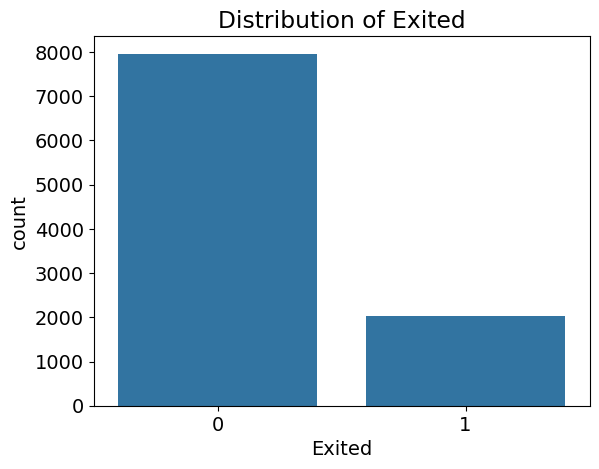

In [13]:
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Exited')

People slightly older are leaving, around 51 to 60 years old.

The average of the Balance of the people who left is slightly higher than the average of the ones who stayed.

The other variables show some minor impact. Maybe it is worth considering them since they may strong influence when combined with others.

A library with auto feature engineering may reveal important aspects. A sensitivity analysis can also show how important each feature is on the output.

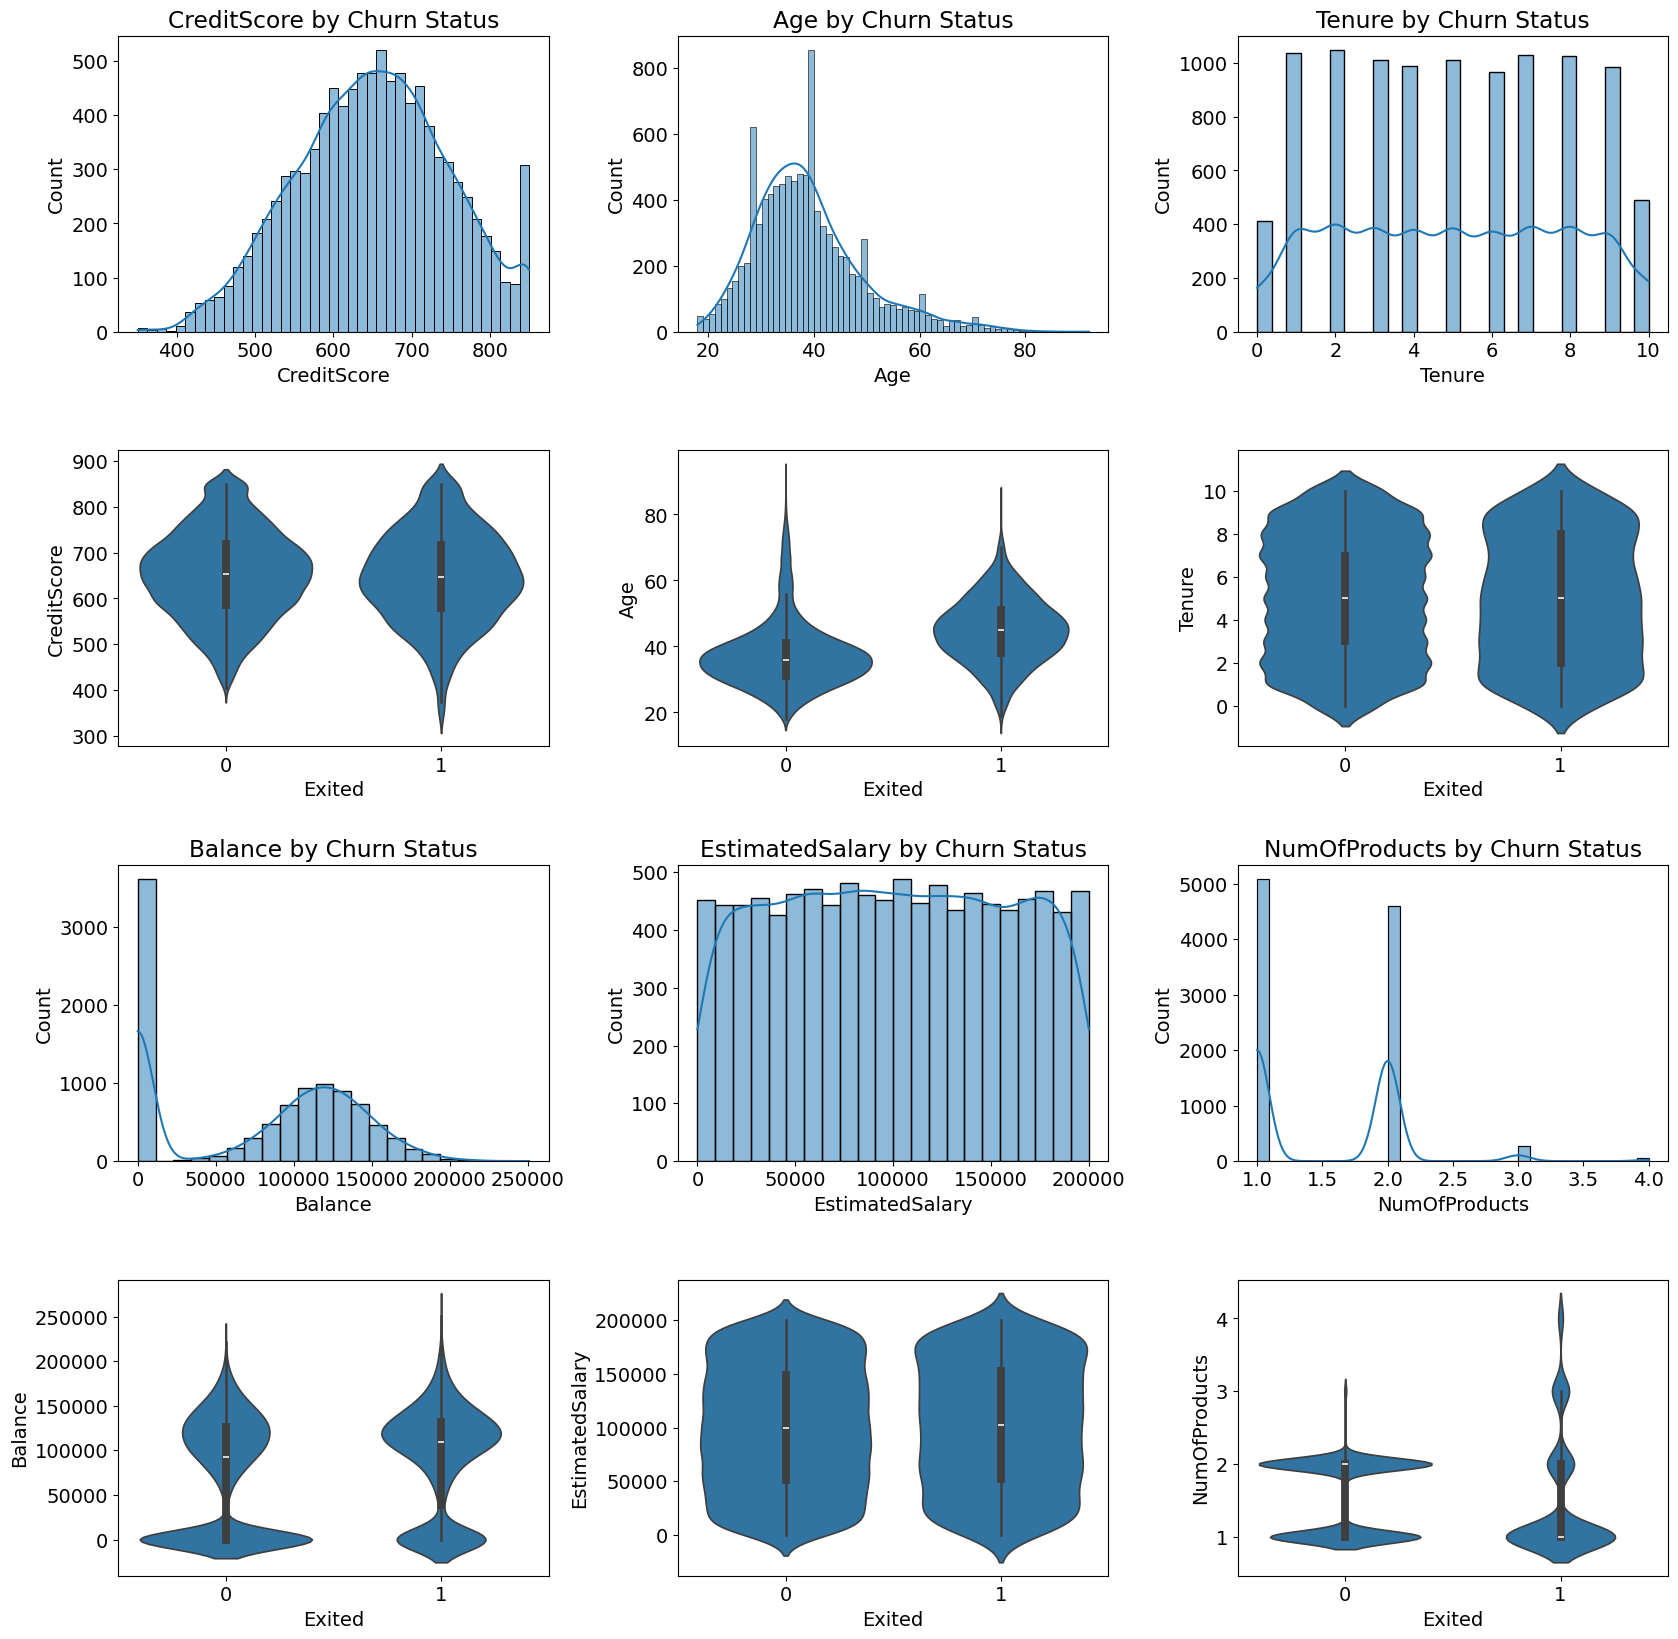

In [14]:
# Select numerical features for analysis
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts']
n = len(num_features)

# Create subplot grid
fig, axes = plt.subplots(4, int(n/2), figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Univariate and Bivariate Analysis
for i, feature in enumerate(num_features):
    # Univariate analysis (top row)
    sns.histplot(df[feature], ax=axes[0+int(i>2)*2, i%3], kde=True)
    axes[0+int(i>2)*2, i%3].set_title(f'Distribution of {feature}')
    
    # Bivariate analysis (bottom row)
    sns.violinplot(x='Exited', y=feature, data=df, ax=axes[1+int(i>2)*2, i%3])
    axes[0+int(i>2)*2, i%3].set_title(f'{feature} by Churn Status')
    
plt.show()

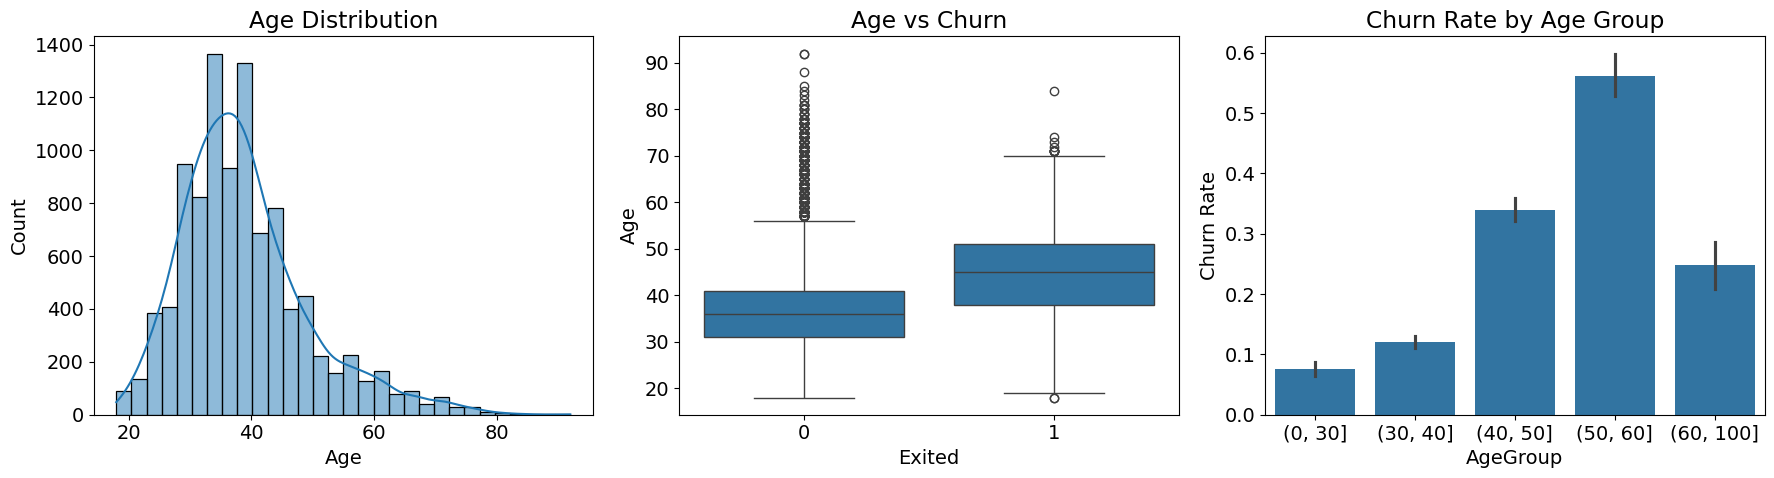

In [15]:
# Binned features
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100])
df['BalanceTier'] = pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, 200000, float('inf')])
df['EstimatedSalaryTier'] = pd.cut(df['Balance'], bins=[0, 50000, 100000, 200000])
df['CreditScoreTier'] = pd.cut(df['CreditScore'], bins=[300, 500, 600, 700, 800, 850])

# Criação dos subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico 1: Distribuição de Idades
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Age Distribution')

# Gráfico 2: Idade vs Churn
sns.boxplot(data=df, x='Exited', y='Age', ax=axes[1])
axes[1].set_title('Age vs Churn')

# Gráfico 3: Churn por Faixa Etária
sns.barplot(data=df, x='AgeGroup', y='Exited', ax=axes[2])
axes[2].set_title('Churn Rate by Age Group')
axes[2].set_ylabel('Churn Rate')

plt.tight_layout()
plt.show()

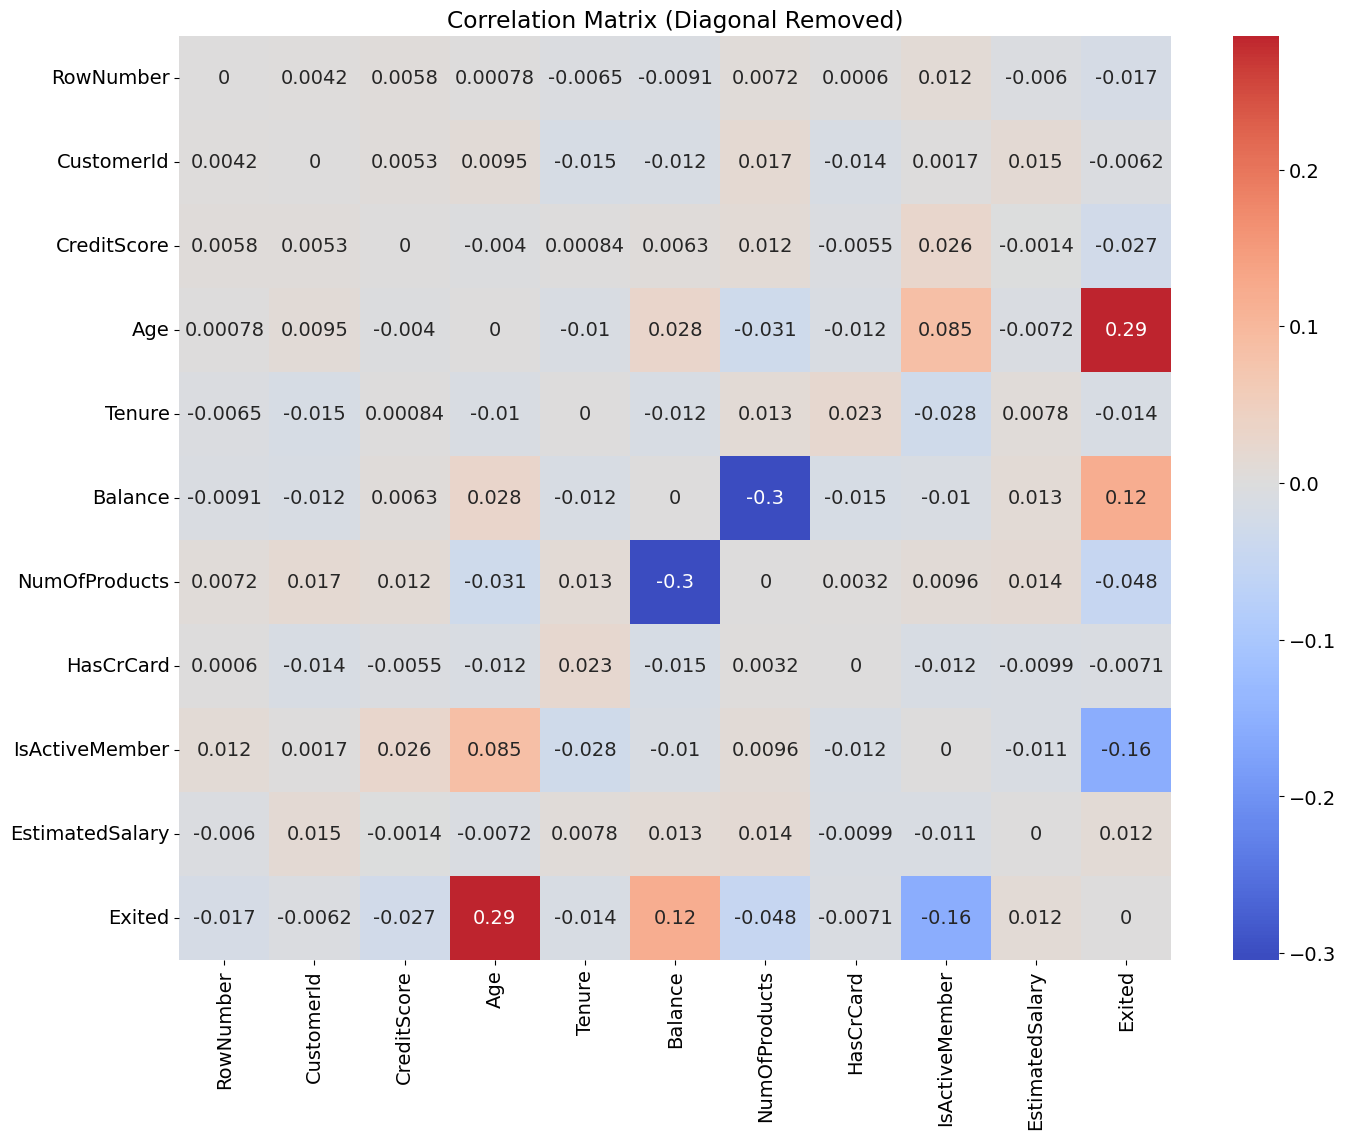

In [16]:
# Calcula a matriz de correlação
corr = df.corr(numeric_only=True)

# Zera a diagonal
np.fill_diagonal(corr.values, 0)

# Plota a matriz de correlação com diagonal zerada
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Diagonal Removed)')
plt.show()


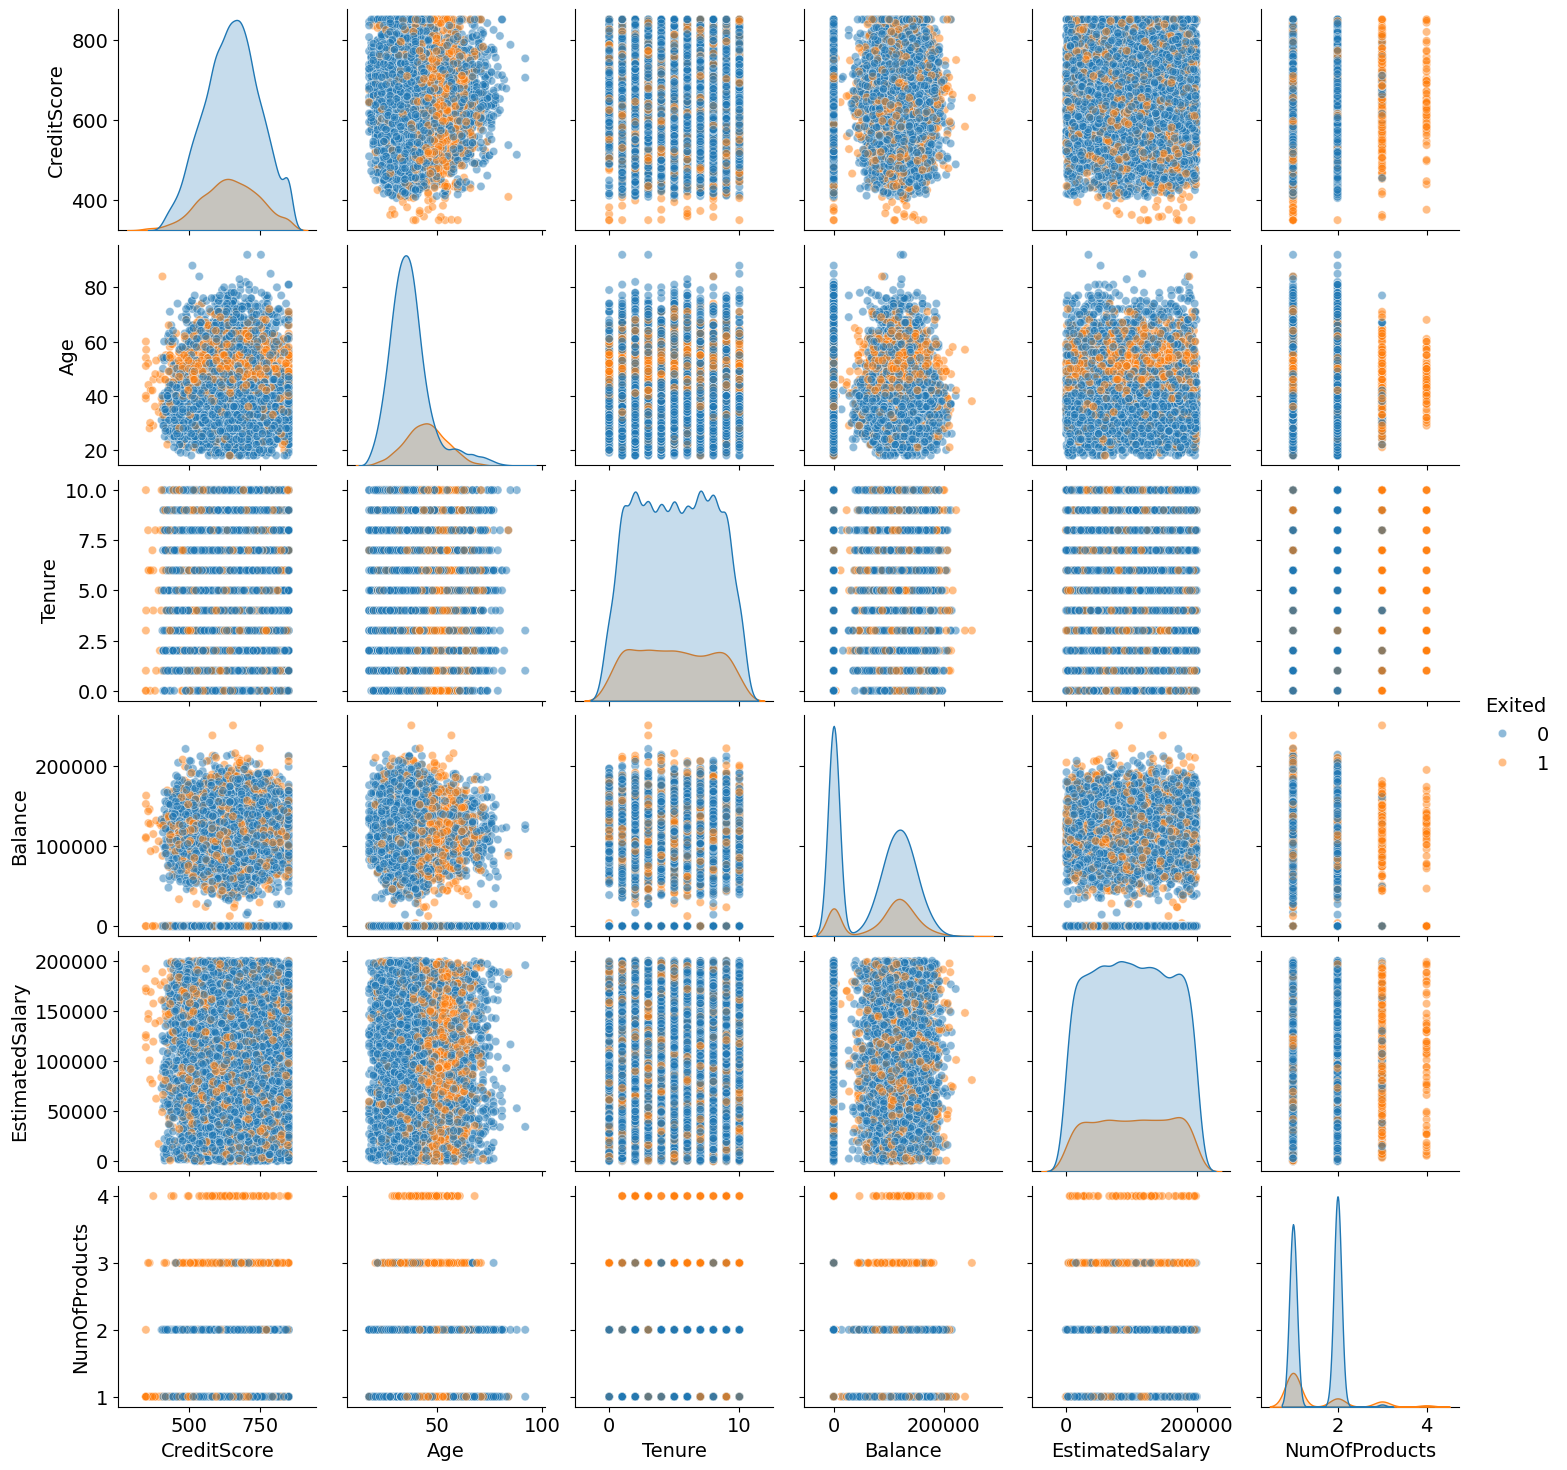

In [17]:
sns.pairplot(df, vars=num_features, hue='Exited', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

It can be seen that the Age is a very important feature, because people with around 50 y.o. are leaving the bank.

The Balance and Number of Products are features that may influence Churn.

This can be investigated further in more details, as it will be done down below.

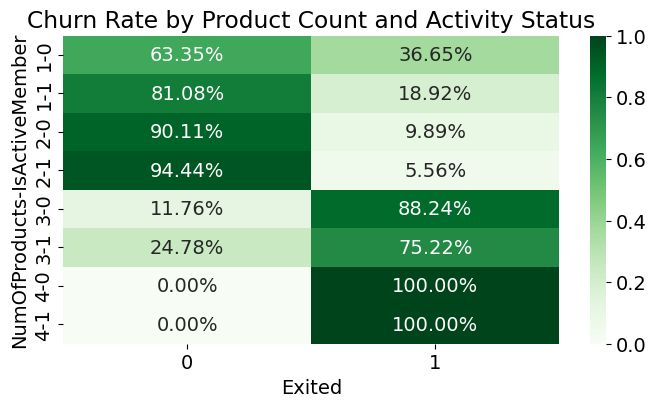

In [18]:
ct2 = pd.crosstab(index=[df['NumOfProducts'], df['IsActiveMember']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(8,4))
sns.heatmap(ct2, annot=True, fmt='.2%', cmap='Greens')
plt.title('Churn Rate by Product Count and Activity Status')
plt.show()

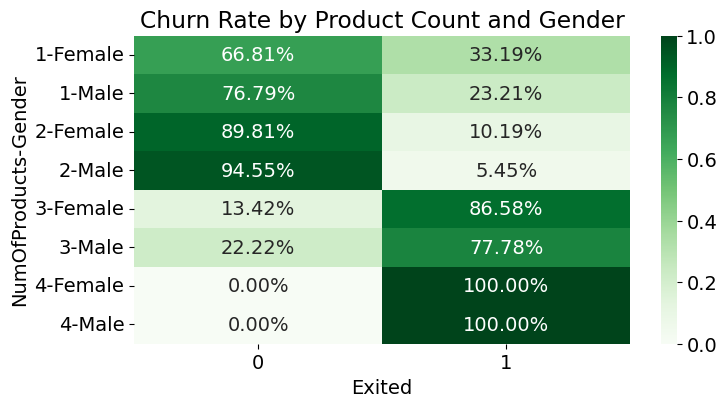

In [19]:
ct2 = pd.crosstab(index=[df['NumOfProducts'], df['Gender']],
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(8,4))
sns.heatmap(ct2, annot=True, fmt='.2%', cmap='Greens')
plt.title('Churn Rate by Product Count and Gender')
plt.show()

Being inactive seems to increase the Churn possibility. And having more products is also a factor. Having 2 products is optimal for the bank, as seen before.

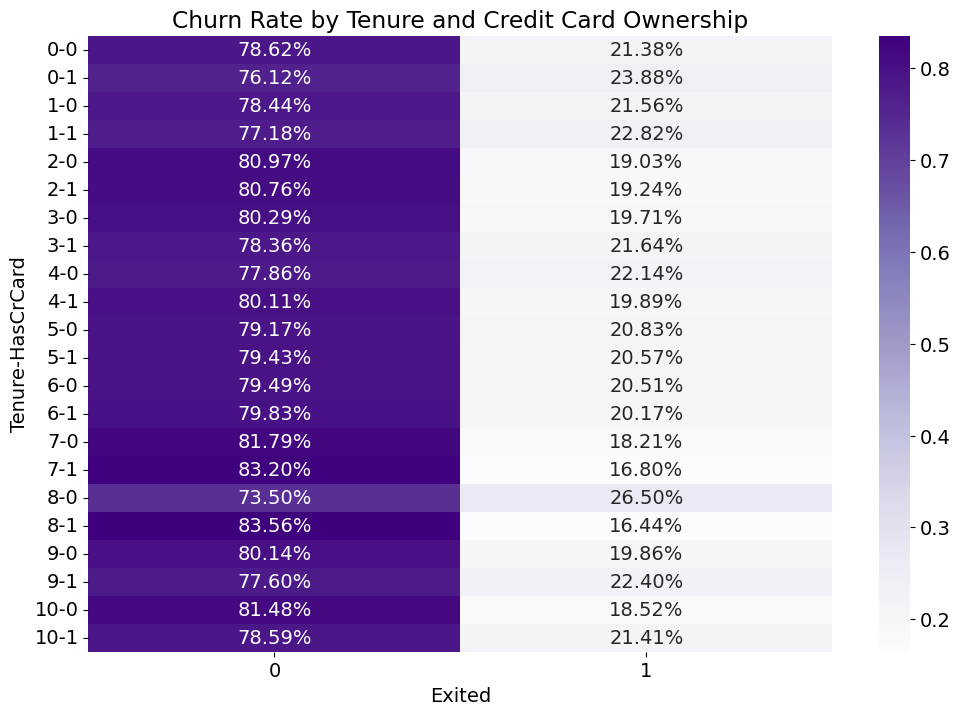

In [20]:
ct3 = pd.crosstab(index=[df['Tenure'], df['HasCrCard']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(ct3, annot=True, fmt='.2%', cmap='Purples')
plt.title('Churn Rate by Tenure and Credit Card Ownership')
plt.show()

Tenure does not seem to matter much. Looking at age, only older people can have more Tenure. Thus, Age is a more important feature and probably that's why the Churn is concentrated a bit more with a Tenure of 8 years. Having a credit card has a nonlinear impact, but it influences the Churn very little.

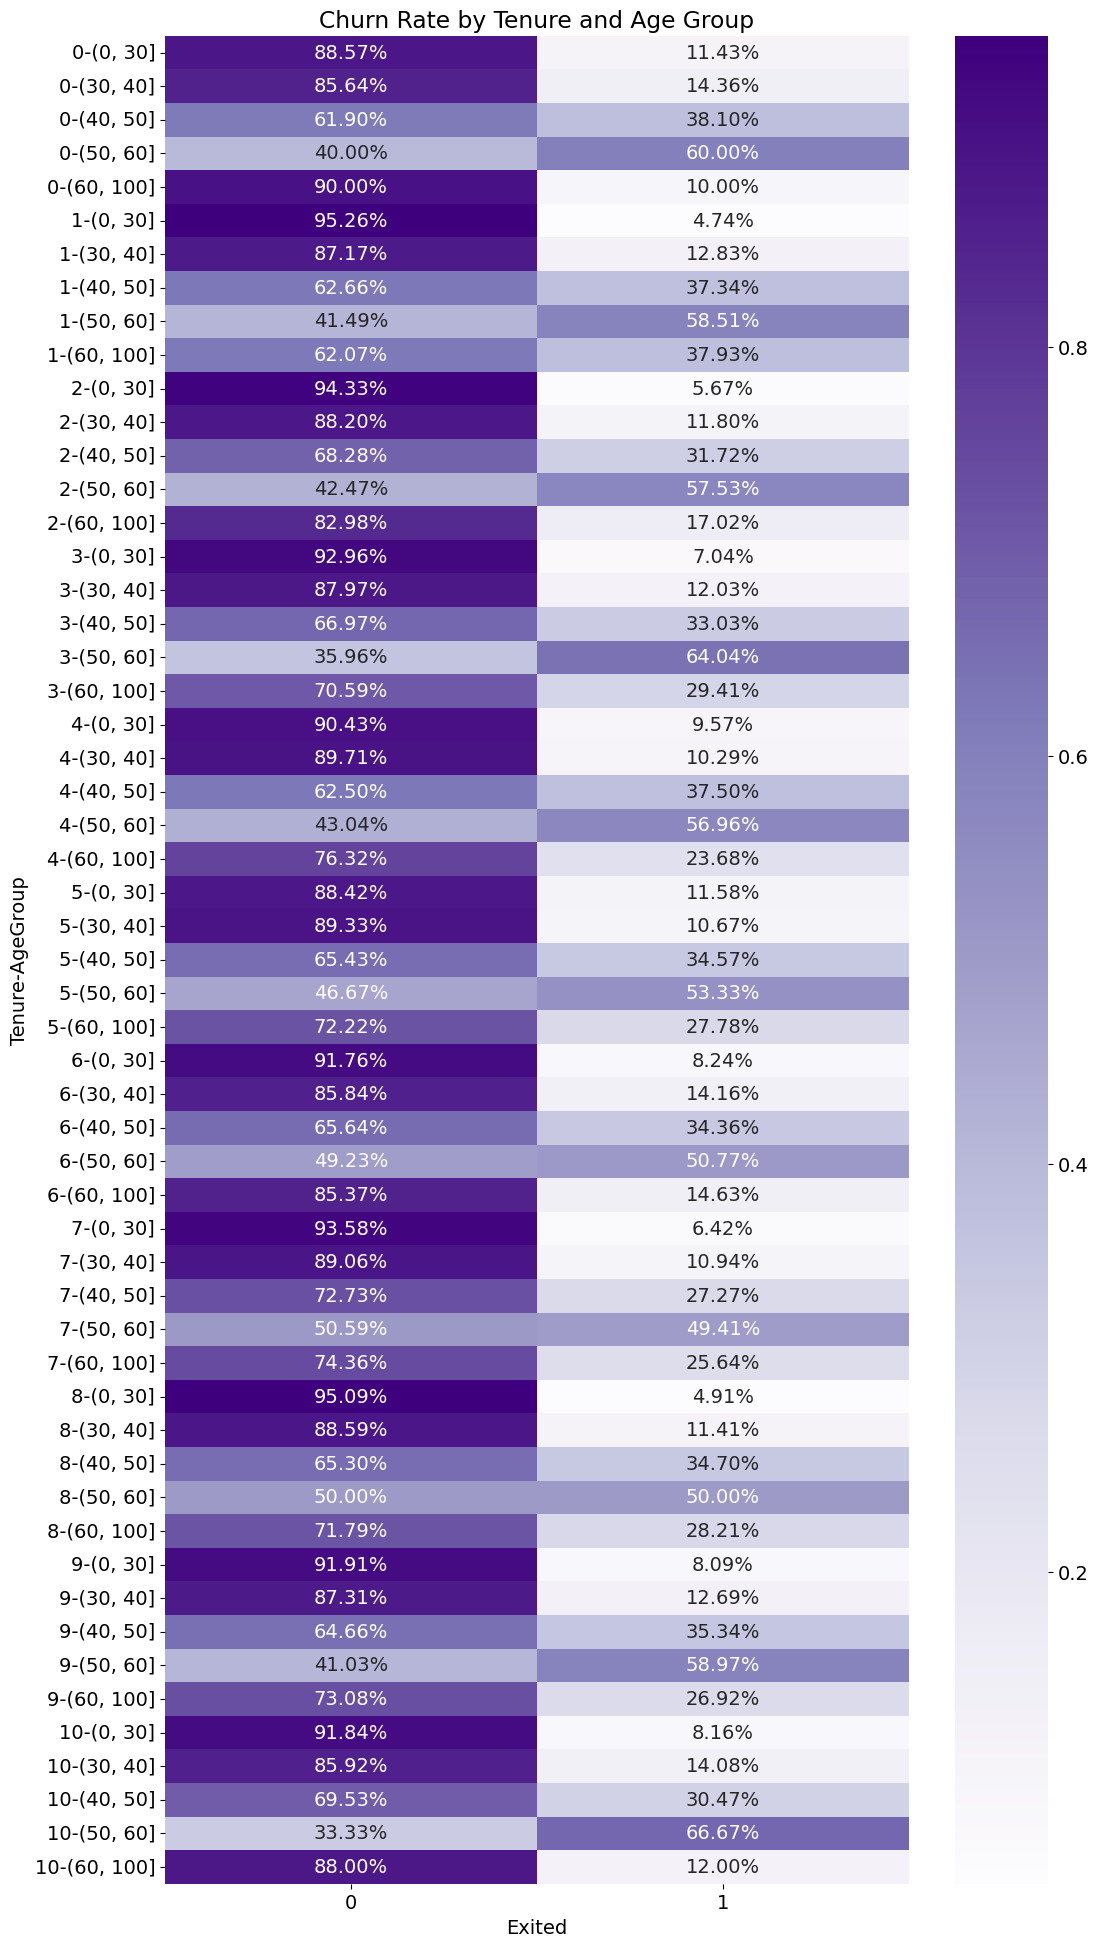

In [21]:
ct3 = pd.crosstab(index=[df['Tenure'], df['AgeGroup']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(12,24))
sns.heatmap(ct3, annot=True, fmt='.2%', cmap='Purples')
plt.title('Churn Rate by Tenure and Age Group')
plt.show()

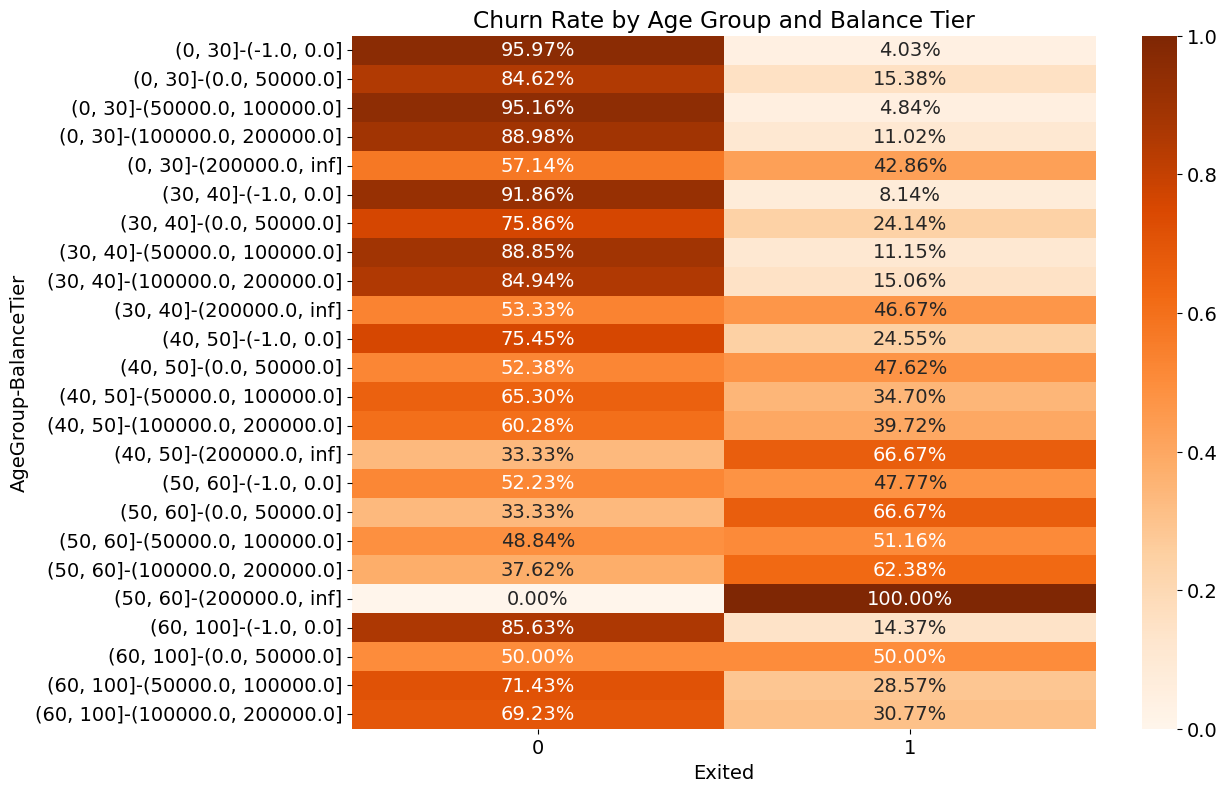

In [22]:
ct4 = pd.crosstab(index=[df['AgeGroup'], df['BalanceTier']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(12,9))
sns.heatmap(ct4, annot=True, fmt='.2%', cmap='Oranges')
plt.title('Churn Rate by Age Group and Balance Tier')
plt.show()

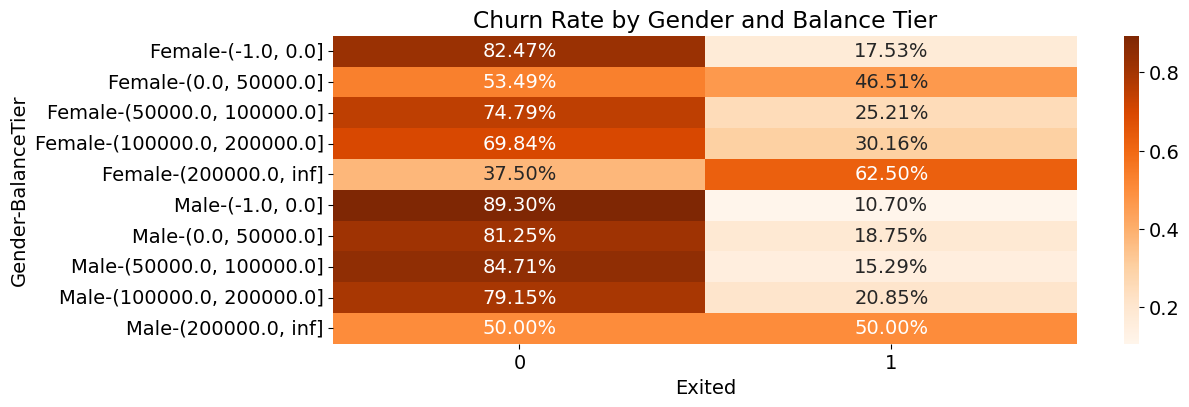

In [23]:
ct4 = pd.crosstab(index=[df['Gender'], df['BalanceTier']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(12,4))
sns.heatmap(ct4, annot=True, fmt='.2%', cmap='Oranges')
plt.title('Churn Rate by Gender and Balance Tier')
plt.show()

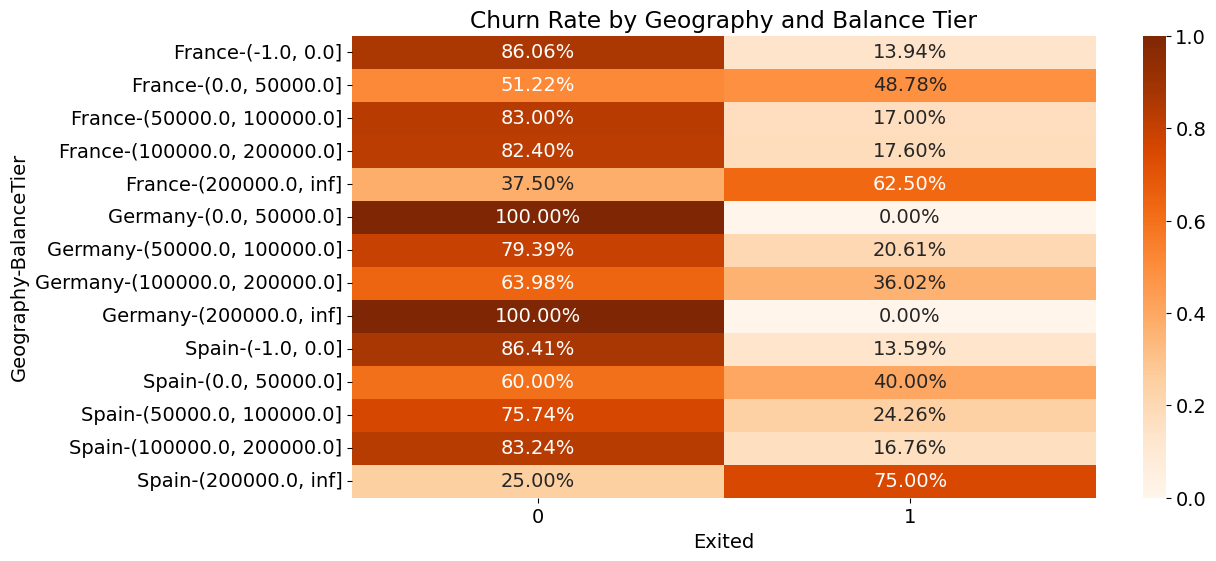

In [24]:
ct4 = pd.crosstab(index=[df['Geography'], df['BalanceTier']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(12,6))
sns.heatmap(ct4, annot=True, fmt='.2%', cmap='Oranges')
plt.title('Churn Rate by Geography and Balance Tier')
plt.show()

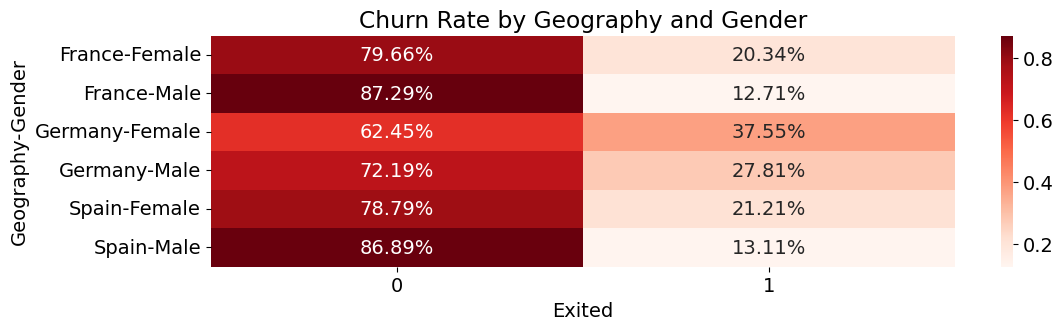

In [25]:
ct4 = pd.crosstab(index=[df['Geography'], df['Gender']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(12,3))
sns.heatmap(ct4, annot=True, fmt='.2%', cmap='Reds')
plt.title('Churn Rate by Geography and Gender')
plt.show()

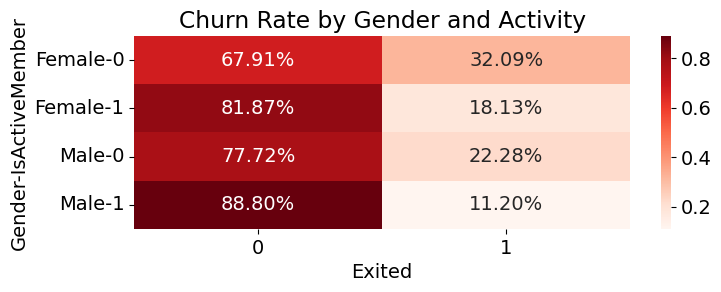

In [26]:
ct2 = pd.crosstab(index=[df['Gender'], df['IsActiveMember']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(8,2.5))
sns.heatmap(ct2, annot=True, fmt='.2%', cmap='Reds')
plt.title('Churn Rate by Gender and Activity')
plt.show()

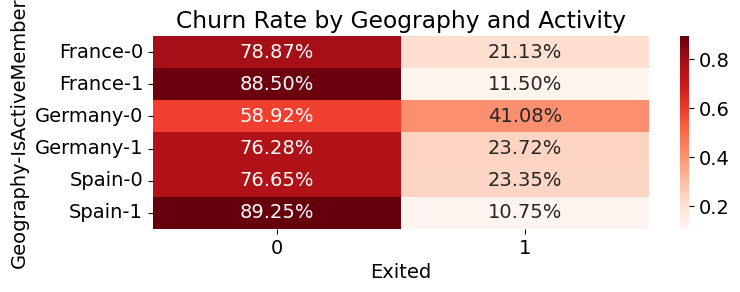

In [27]:
ct2 = pd.crosstab(index=[df['Geography'], df['IsActiveMember']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(8,2.5))
sns.heatmap(ct2, annot=True, fmt='.2%', cmap='Reds')
plt.title('Churn Rate by Geography and Activity')
plt.show()

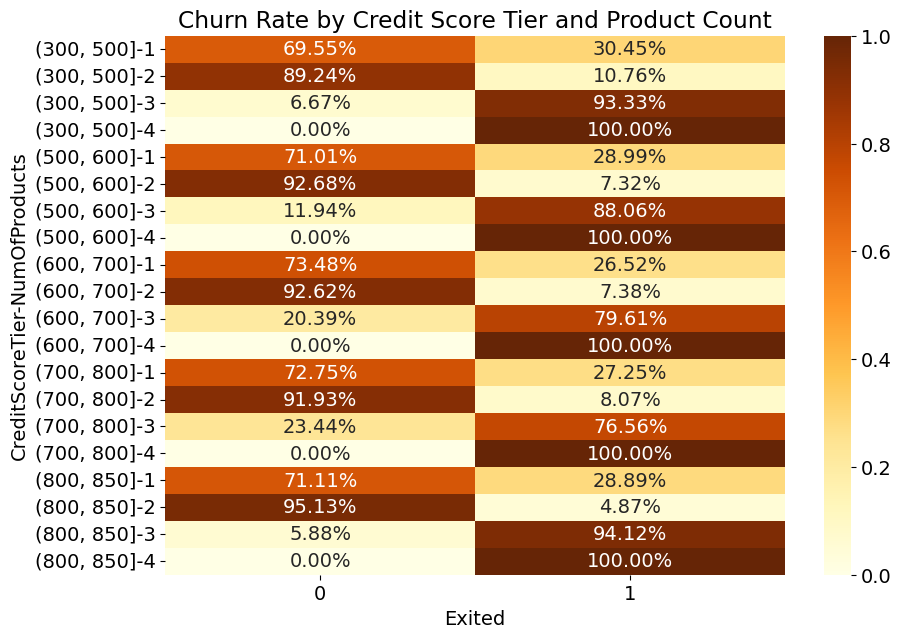

In [28]:
ct5 = pd.crosstab(index=[df['CreditScoreTier'], df['NumOfProducts']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(10,7))
sns.heatmap(ct5, annot=True, fmt='.2%', cmap='YlOrBr')
plt.title('Churn Rate by Credit Score Tier and Product Count')
plt.show()

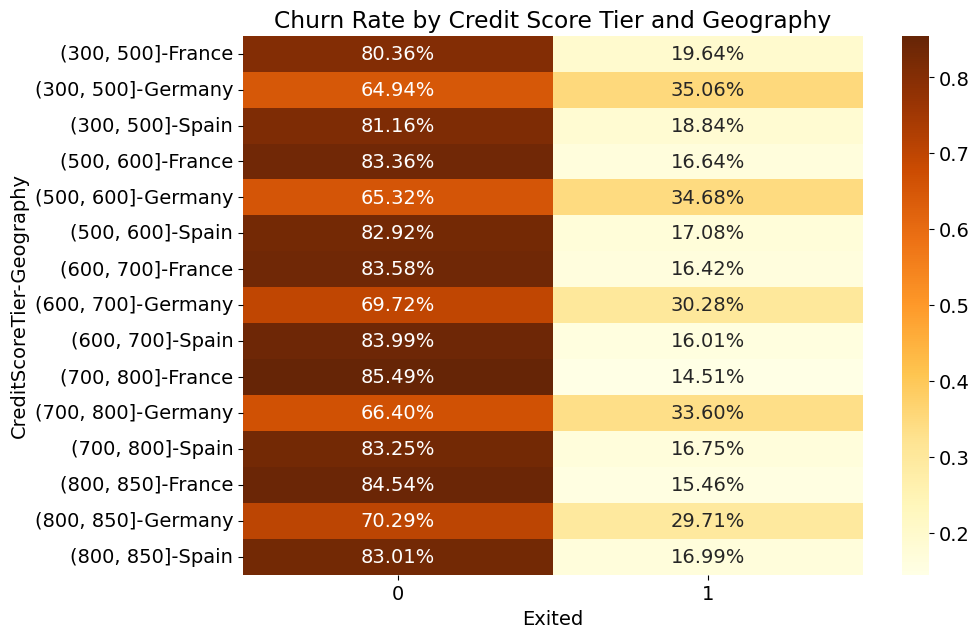

In [29]:
ct5 = pd.crosstab(index=[df['CreditScoreTier'], df['Geography']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(10,7))
sns.heatmap(ct5, annot=True, fmt='.2%', cmap='YlOrBr')
plt.title('Churn Rate by Credit Score Tier and Geography')
plt.show()

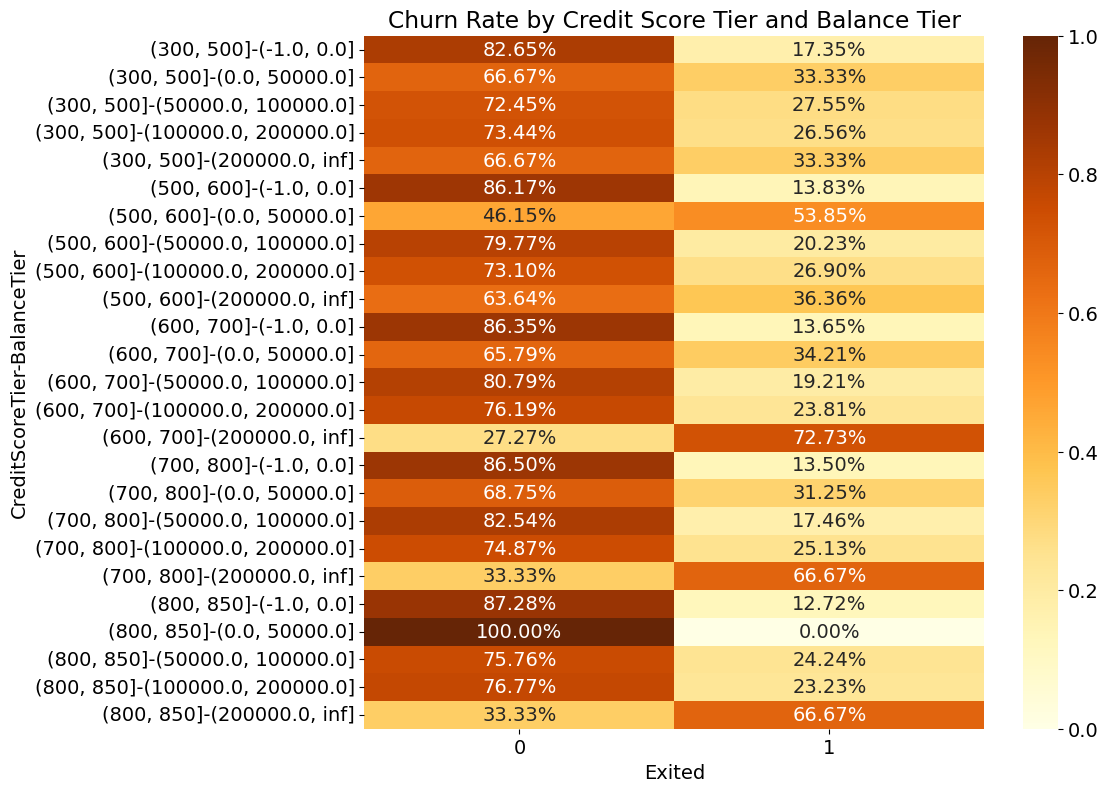

In [30]:
ct5 = pd.crosstab(index=[df['CreditScoreTier'], df['BalanceTier']], 
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(10,9))
sns.heatmap(ct5, annot=True, fmt='.2%', cmap='YlOrBr')
plt.title('Churn Rate by Credit Score Tier and Balance Tier')
plt.show()

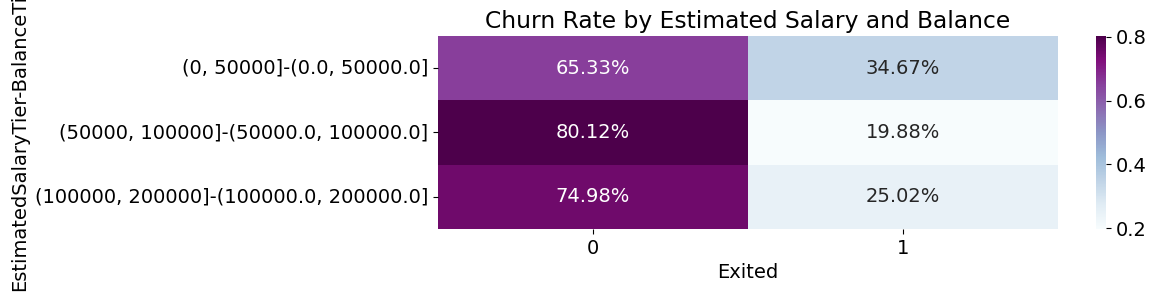

In [31]:
ct5 = pd.crosstab(index=[df['EstimatedSalaryTier'], df['BalanceTier']],
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(10,2.5))
sns.heatmap(ct5, annot=True, fmt='.2%', cmap='BuPu')
plt.title('Churn Rate by Estimated Salary and Balance')
plt.show()

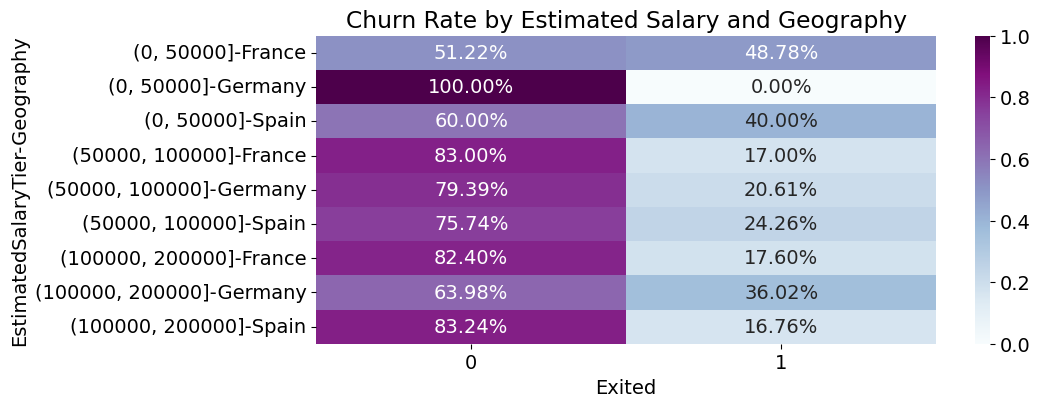

In [32]:
ct5 = pd.crosstab(index=[df['EstimatedSalaryTier'], df['Geography']],
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(10,4))
sns.heatmap(ct5, annot=True, fmt='.2%', cmap='BuPu')
plt.title('Churn Rate by Estimated Salary and Geography')
plt.show()

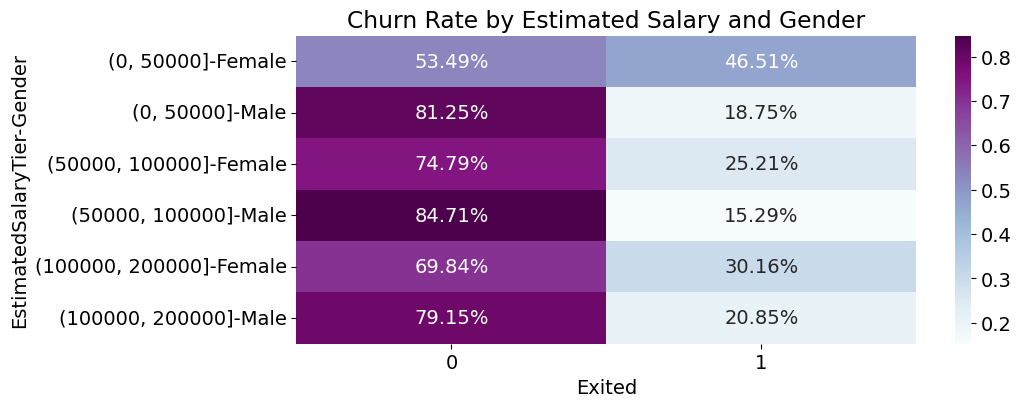

In [33]:
ct5 = pd.crosstab(index=[df['EstimatedSalaryTier'], df['Gender']],
                 columns=df['Exited'], normalize='index')
plt.figure(figsize=(10,4))
sns.heatmap(ct5, annot=True, fmt='.2%', cmap='BuPu')
plt.title('Churn Rate by Estimated Salary and Gender')
plt.show()

In [34]:
from scipy import stats

for cat in cat_features:
    # Create a contingency table
    contingency = pd.crosstab(df[cat], df['Exited'])

    # Run chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation
    if p_val < 0.05:
        print(f"Significant association exists between {cat} and Exited \n")
    else:
        print(f"No significant association between {cat} and Exited \n")

for cat in num_features:
    # Create a contingency table
    contingency = pd.crosstab(df[cat], df['Exited'])

    # Run chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation
    if p_val < 0.05:
        print(f"Significant association exists between {cat} and Exited \n")
    else:
        print(f"No significant association between {cat} and Exited \n")
    

Chi-square statistic: 301.2553
p-value: 0.0000
Degrees of freedom: 2
Significant association exists between Geography and Exited 

Chi-square statistic: 112.9186
p-value: 0.0000
Degrees of freedom: 1
Significant association exists between Gender and Exited 

Chi-square statistic: 242.9853
p-value: 0.0000
Degrees of freedom: 1
Significant association exists between IsActiveMember and Exited 

Chi-square statistic: 0.4713
p-value: 0.4924
Degrees of freedom: 1
No significant association between HasCrCard and Exited 

Chi-square statistic: 1503.6294
p-value: 0.0000
Degrees of freedom: 3
Significant association exists between NumOfProducts and Exited 

Chi-square statistic: 510.2164
p-value: 0.0492
Degrees of freedom: 459
Significant association exists between CreditScore and Exited 

Chi-square statistic: 1607.4789
p-value: 0.0000
Degrees of freedom: 69
Significant association exists between Age and Exited 

Chi-square statistic: 13.9004
p-value: 0.1776
Degrees of freedom: 10
No significan

Pearson's r: -0.0271
p-value: 0.0067
Significant negative correlation (r = -0.03) between CreditScore and Exited



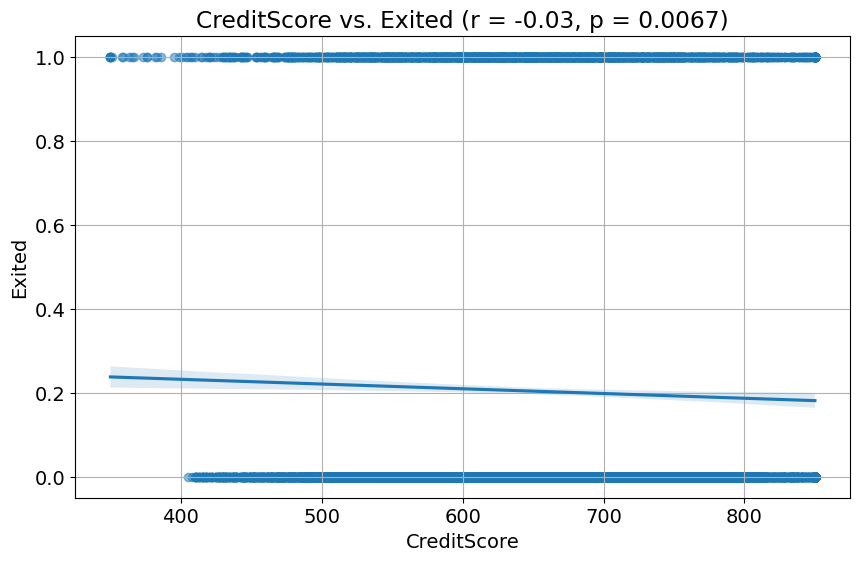

Pearson's r: 0.2853
p-value: 0.0000
Significant positive correlation (r = 0.29) between Age and Exited



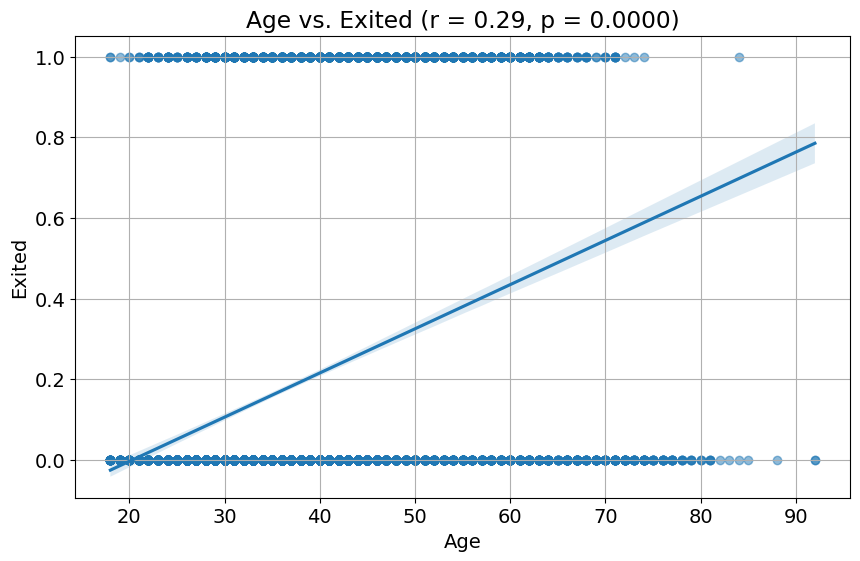

Pearson's r: -0.0140
p-value: 0.1615
No significant correlation between Tenure and Exited



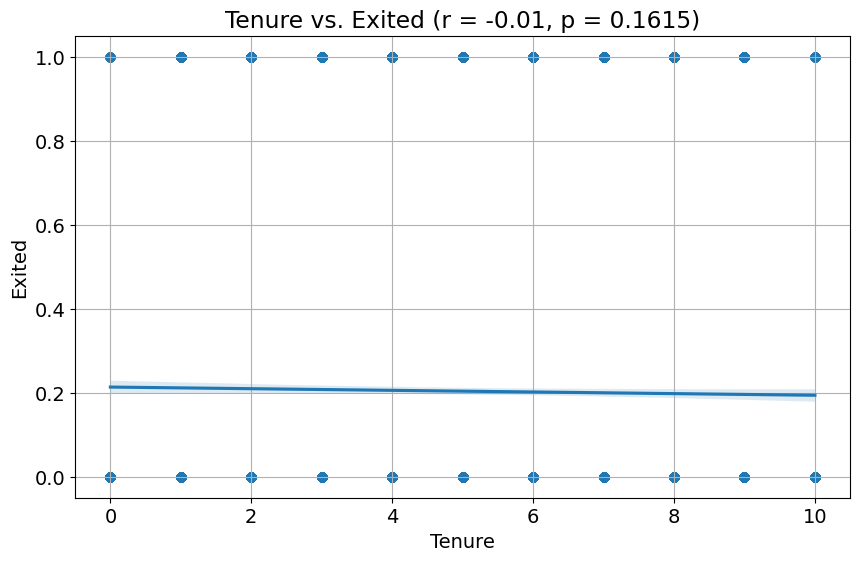

Pearson's r: 0.1185
p-value: 0.0000
Significant positive correlation (r = 0.12) between Balance and Exited



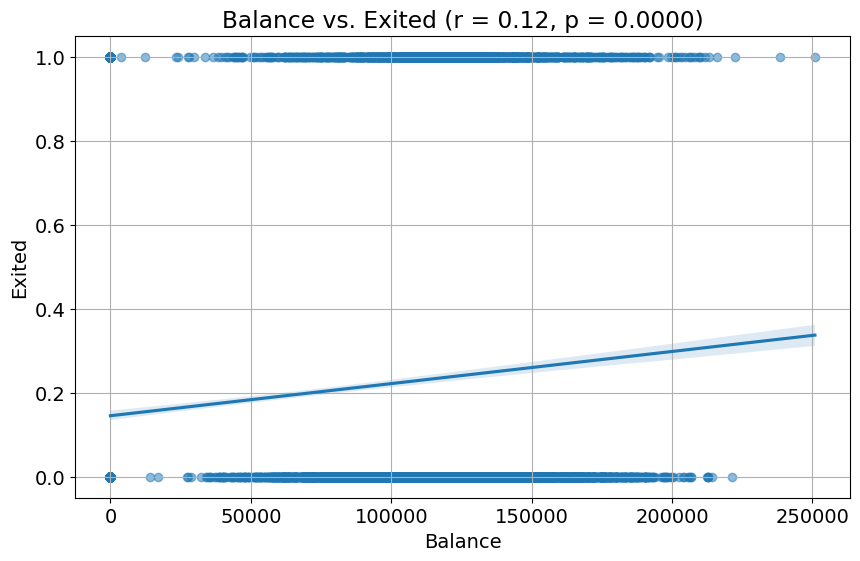

Pearson's r: 0.0121
p-value: 0.2264
No significant correlation between EstimatedSalary and Exited



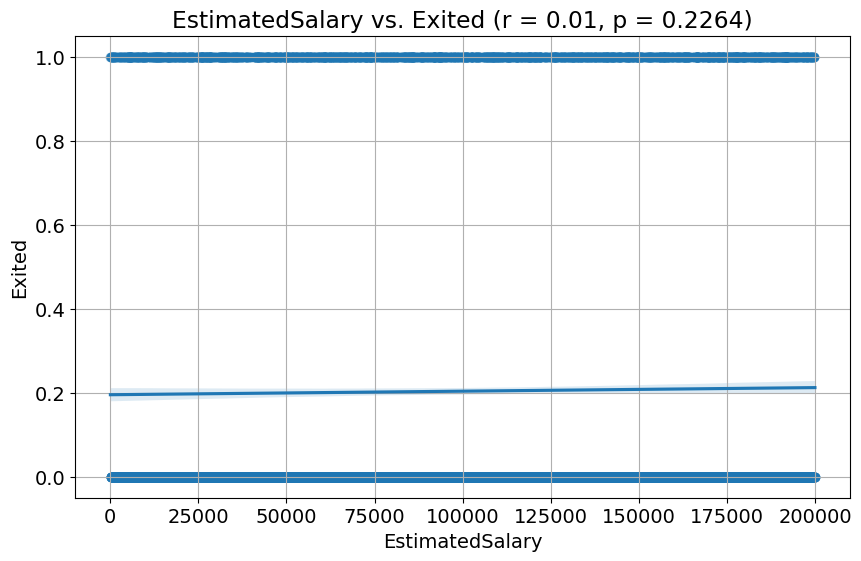

Pearson's r: -0.0478
p-value: 0.0000
Significant negative correlation (r = -0.05) between NumOfProducts and Exited



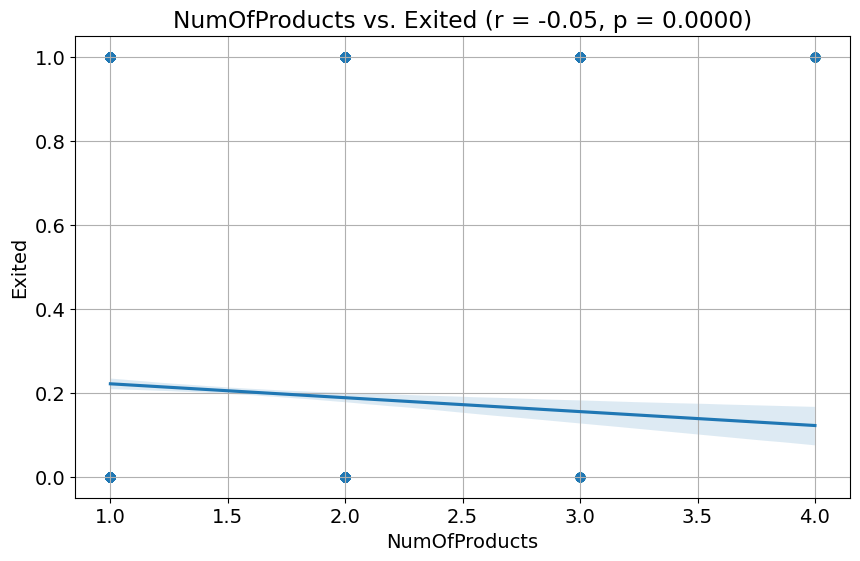

In [35]:
for cat in num_features:
    # Calculate Pearson correlation
    r, p_val = stats.pearsonr(df[cat], df['Exited'])
    
    print(f"Pearson's r: {r:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    if p_val < 0.05:
        if r > 0:
            print(f"Significant positive correlation (r = {r:.2f}) between {cat} and Exited")
        else:
            print(f"Significant negative correlation (r = {r:.2f}) between {cat} and Exited")
    else:
        print(f"No significant correlation between {cat} and Exited")
    print('')

    # Visualize with scatter plot and regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=cat, y='Exited', data=df, scatter_kws={'alpha':0.5})
    plt.title(f'{cat} vs. Exited (r = {r:.2f}, p = {p_val:.4f})')
    plt.xlabel(cat)
    plt.ylabel('Exited')
    plt.grid(True)
    plt.show()

- Having higher Balance and higher Age, around 50 y.o., seems to increase Churn.

- Also, having between 0 (not included) and 50k in Balance increases the chance of Churn.

- Although, in Germany the pattern shifts a bit, where having between 50k and 200k of Balance concentrates the Churn. So Geography is a very important feature and it relates to other variables differently, impacting Churn.

- If the member is inactive, it basically doubles the Churn.

- Having more products is also a factor. Having 2 products is optimal for the bank, as seen before.

- It seems that there is a range within CreditScore where there is more Churn.

- Finally, in Spain and France people that have a smaller Estimated Salary tend to leave more, while in Germany it is people who tend to earn more that leave.

- Geography, Balance, Activity, Age, NumOfProducts, CreditScore, and Gender are important features to use for training a predictive model.

## Feature importance

#### Data preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, ConfusionMatrixDisplay

df = pd.read_csv('data/Churn_clients.csv')

# Encode categorical variables
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

XGBoost Accuracy: 0.8555
XGBoost ROC AUC: 0.8475


<Figure size 1000x600 with 0 Axes>

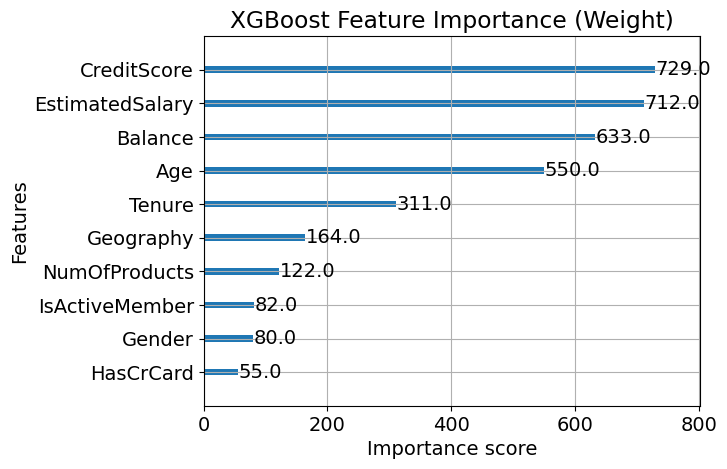

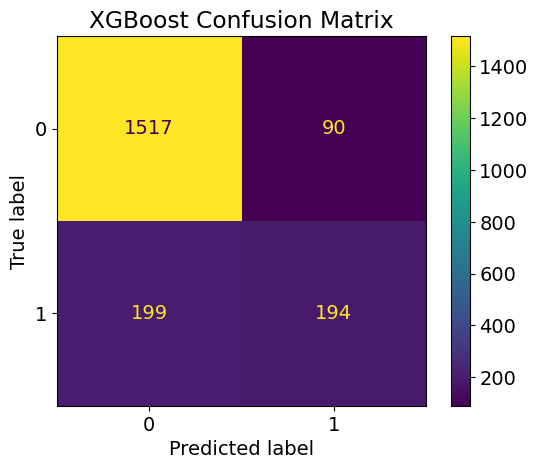

In [37]:
import xgboost as xgb
from xgboost import plot_importance

# Train XGBoost model
model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"XGBoost ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

# Feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=15, importance_type='weight')
plt.title('XGBoost Feature Importance (Weight)')
plt.show()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('XGBoost Confusion Matrix')
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tabpfn\base.py:89: UserWarning: Downloading model to C:\Users\gabri\AppData\Roaming\tabpfn\tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\gabri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tabpfn\classifier.py:432: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(



TabPFN Accuracy: 0.8630
TabPFN ROC AUC: 0.8648


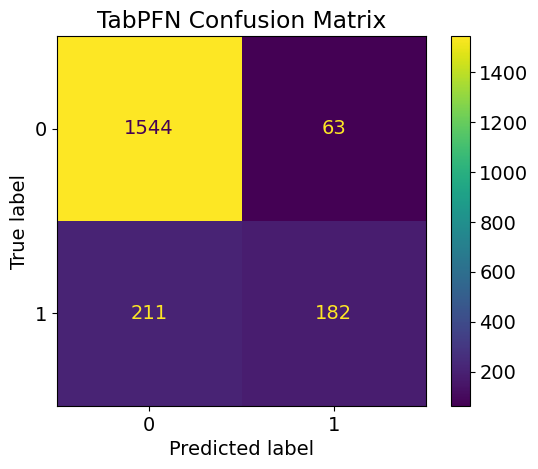

In [38]:
from tabpfn import TabPFNClassifier

# Initialize TabPFN (works best with <1000 samples)
n_samples = min(1000, len(X_train))  # TabPFN limitation
X_train_tabpfn = X_train[:n_samples].values
y_train_tabpfn = y_train[:n_samples].values

# Train TabPFN
tabpfn = TabPFNClassifier(device='cpu')
tabpfn.fit(X_train_tabpfn, y_train_tabpfn)

# Evaluate
tabpfn_probs = tabpfn.predict_proba(X_test.values)[:, 1]
tabpfn_preds = (tabpfn_probs > 0.5).astype(int)
print(f"\nTabPFN Accuracy: {accuracy_score(y_test, tabpfn_preds):.4f}")
print(f"TabPFN ROC AUC: {roc_auc_score(y_test, tabpfn_probs):.4f}")

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, tabpfn_preds)
plt.title('TabPFN Confusion Matrix')
plt.show()

In [39]:
# Compare model performances
results = pd.DataFrame({
    'Model': ['XGBoost', 'TabPFN'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, tabpfn_preds)],
    'ROC AUC': [roc_auc_score(y_test, model.predict_proba(X_test)[:,1]), roc_auc_score(y_test, tabpfn_probs)]
})

print("\nModel Comparison:")
print(results)

# Top 3 impactful features from XGBoost
top_features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)[:5]
print("\nTop 5 Most Important Features:")
print(top_features)


Model Comparison:
     Model  Accuracy   ROC AUC
0  XGBoost    0.8555  0.847498
1   TabPFN    0.8630  0.864839

Top 5 Most Important Features:
NumOfProducts     0.342017
IsActiveMember    0.215270
Age               0.121507
Geography         0.072140
Balance           0.056114
dtype: float32


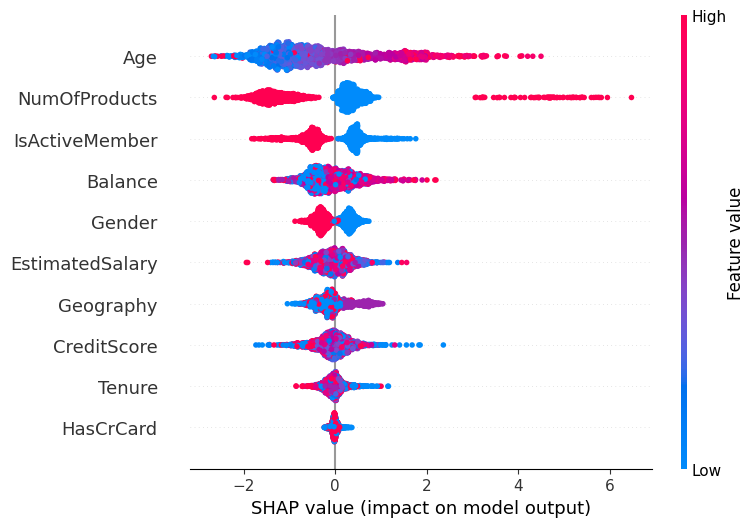

In [40]:
# SHAP values for detailed feature effects
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Conclusions:

- Older people are leaving
- Churn is concentrated for 1, 3, or 4 products
- Inactive members tend to leave more
- People with higher balance are leaving more
- The churn is higher within females
- Estimated Salary alone would not be very useful, but it helps when combined with Geography, for example
- Looking at Geography, Germans are leaving more
- Lower Credit Score show slightly higher churn, but it is not a very useful feature
- Tenure and Has Credit Card alone are not very useful features as well